In [1]:
from copy import deepcopy
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
pet_path = './/files//subj02_pet.nii'
water_path = './/files//subj02_water.nii'
fat_path = './/files//subj02_fat.nii'

water_file = nib.load(water_path)
fat_file = nib.load(fat_path)
pet_file = nib.load(pet_path)

In [3]:
water_data = water_file.get_fdata()
fat_data = fat_file.get_fdata()
pet_data = pet_file.get_fdata()
print("Water shape: ", water_data.shape)
print("Fat shape: ", fat_data.shape)
print("PET shape: ", pet_data.shape)

Water shape:  (256, 256, 80)
Fat shape:  (256, 256, 80)
PET shape:  (256, 256, 80)


In [4]:
idx_slice = 47
th = 0.3
img_w = np.rot90(water_data[:, :, idx_slice], 3)
img_f = np.rot90(fat_data[:, :, idx_slice], 3)
img_sum = img_w+img_f
MAX = np.amax(img_sum)
img_sum = img_sum / MAX
mask = np.asarray([img_sum > th]).reshape((256,256))
mask_r = np.asarray([img_sum <= th]).reshape((256,256))

img_bin = (img_sum * mask)
img_bin_r = (img_sum * mask_r).astype(bool)

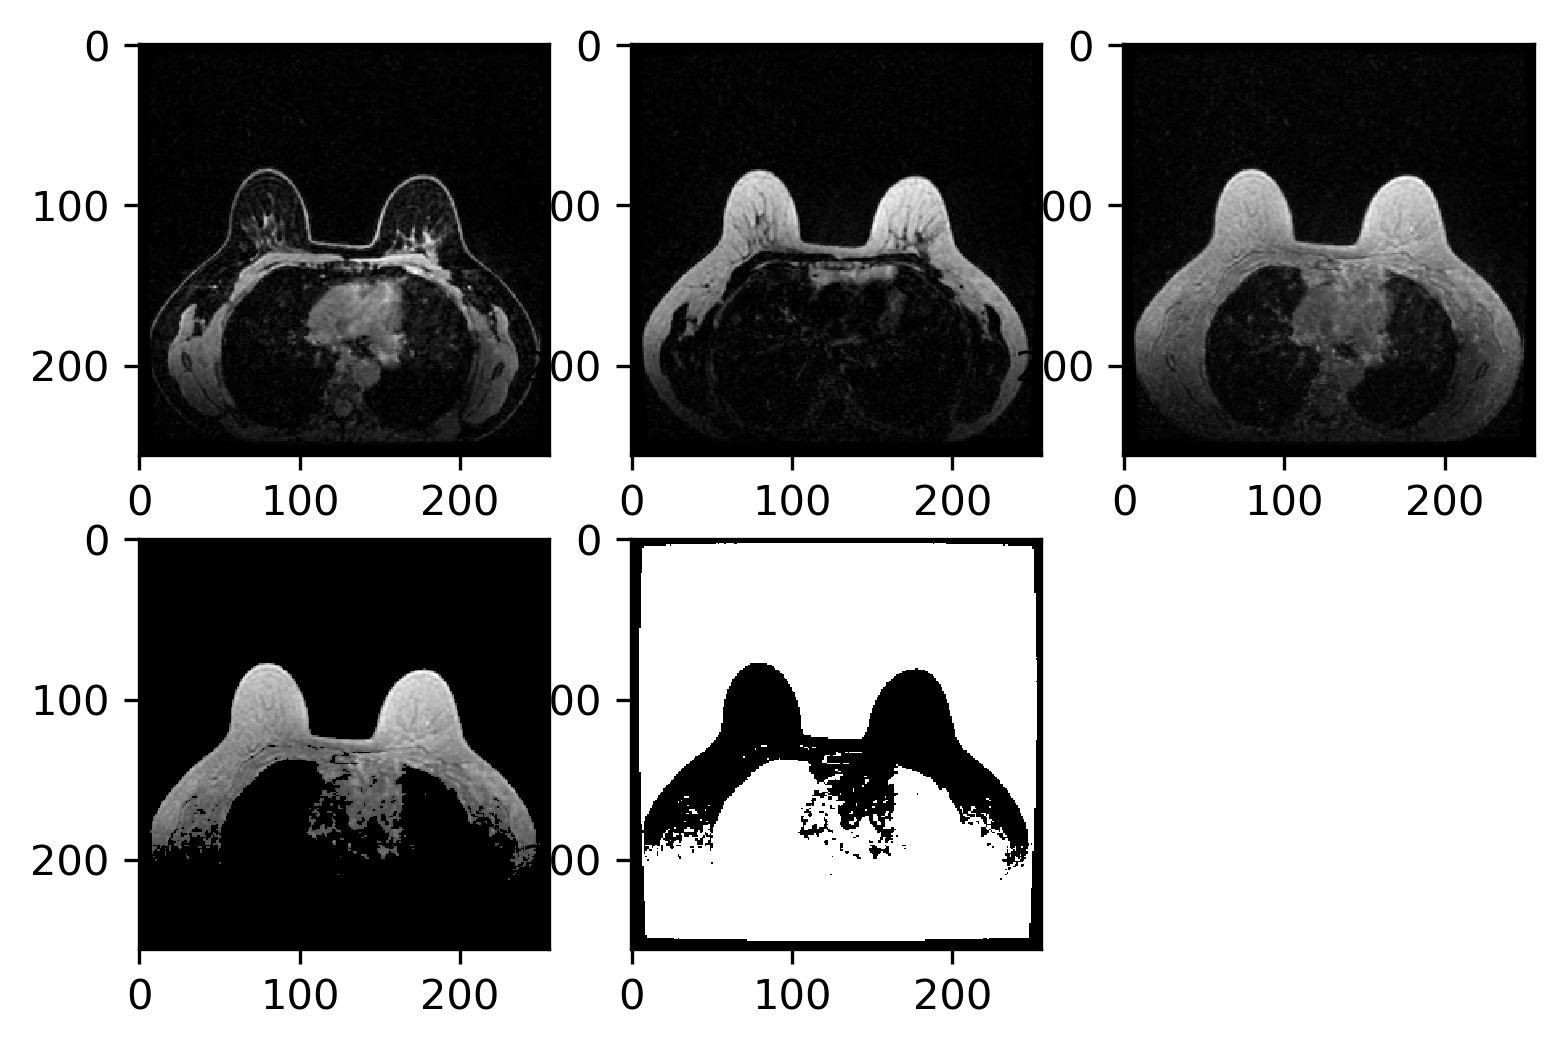

In [5]:
plt.figure(figsize=(6,4), dpi=300)
plt.subplot(231)
plt.imshow(img_w, cmap='gray')
plt.subplot(232)
plt.imshow(img_f, cmap='gray')
plt.subplot(233)
plt.imshow(img_sum, cmap='gray')
plt.subplot(234)
plt.imshow(img_bin, cmap='gray')
plt.subplot(235)
plt.imshow(img_bin_r, cmap='gray')

(array([5.3501e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2300e+02,
        5.6000e+02, 5.1600e+02, 5.1900e+02, 4.2700e+02, 4.9100e+02,
        4.8200e+02, 4.9300e+02, 4.1100e+02, 4.2700e+02, 3.4800e+02,
        3.6100e+02, 3.9500e+02, 4.4000e+02, 4.3900e+02, 4.3000e+02,
        4.0600e+02, 3.8200e+02, 3.7300e+02, 3.1900e+02, 2.9700e+02,
        2.7900e+02, 2.9500e+02, 3.0200e+02, 2.5200e+02, 2.6700e+02,
        2.6500e+02, 2.2500e+02, 2.0300e+02, 2.0200e+02, 1.7200e+02,
        1.4900e+02, 1.0900e+02, 1.0000e+02, 6.5000e+01, 4.6000e+01,
        3.8000e+01, 3.5000e+01, 2.8000e+01, 2.4000e+01, 1.6000e+01,
        5.0000e+00, 9.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 

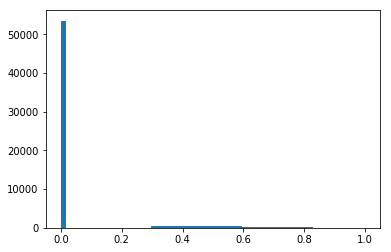

In [6]:
plt.hist(np.ravel(img_bin), bins=64)

In [7]:
print(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [62]:
import skimage.morphology as sm
import skimage.filters.rank as sfr

In [74]:
print(MAX)

1393.0


D:\WinstonChen\envs\UNet\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\WinstonChen\envs\UNet\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
D:\WinstonChen\envs\UNet\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


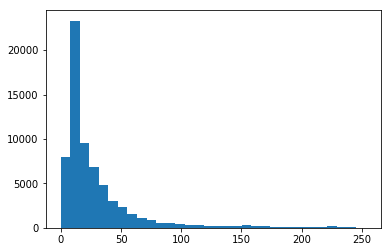

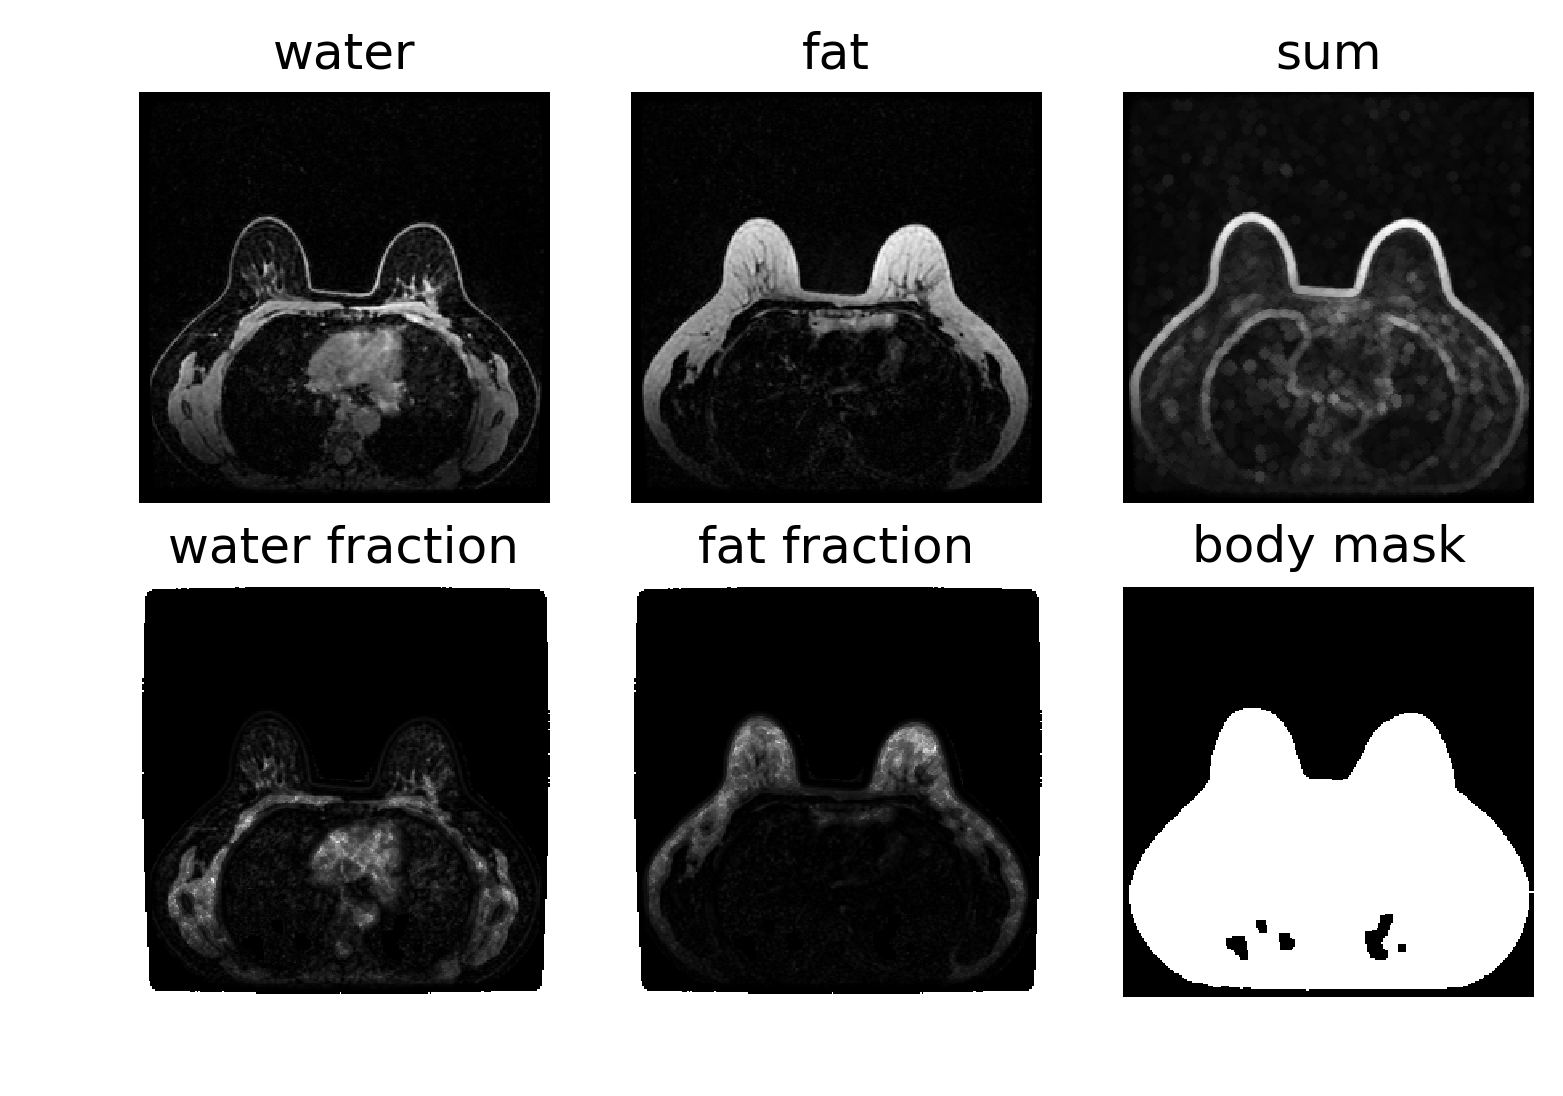

In [90]:
idx_slice = 47
th = 0.7
img_w = np.rot90(water_data[:, :, idx_slice], 3)
img_f = np.rot90(fat_data[:, :, idx_slice], 3)
img_p = np.rot90(pet_data[:, :, idx_slice], 3)
img_sum = img_w+img_f+1

MAX = np.amax(img_sum)
img_sum = img_sum / MAX
# img_sum =sfr.enhance_contrast(img_sum, sm.disk(3))
img_sum = sfr.gradient(img_sum, sm.disk(3))
plt.hist(np.ravel(img_sum), bins=32)
# img_sum = img_sum * MAX / 255

#MAX = np.amax(img_sum)
#img_sum = img_sum / MAX

mask_mri = np.asarray([img_sum > 10]).reshape((256,256)).astype(int)
mask_pet = np.asarray([img_p > 350]).reshape((256,256)).astype(int)
# mask = mask_mri
mask = mask_mri * mask_pet
mask = sm.opening(mask,sm.disk(5)) # open
mask = sm.closing(mask,sm.square(5))


img_wf = np.divide(img_w, img_sum) * mask
img_ff = np.divide(img_f, img_sum) * mask

# img_ff = img_ff/ np.amax(img_ff)
# img_ff[img_ff<0.9] = 0

# img_ff=sm.closing(img_ff,sm.disk(3))
# img_ff=sm.opening(img_ff,sm.disk(1))
# img_ff=sm.closing(img_ff,sm.disk(3))

plt.figure(figsize=(6,4), dpi=300)
plt.subplot(231)
plt.title("water")
plt.axis('off')
plt.imshow(img_w, cmap='gray')
plt.subplot(232)
plt.title("fat")
plt.axis('off')
plt.imshow(img_f, cmap='gray')
plt.subplot(233)
plt.title("sum")
plt.axis('off')
plt.imshow(img_sum, cmap='gray')
plt.subplot(234)
plt.title("water fraction")
plt.axis('off')
plt.imshow(img_wf, cmap='gray')
plt.subplot(235)
plt.title("fat fraction")
plt.axis('off')
plt.imshow(img_ff, cmap='gray')
plt.subplot(236)
plt.title("body mask")
plt.axis('off')
plt.imshow(mask, cmap='gray')

In [9]:
print(img_ff)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(array([33525.,  9177.,  3314.,  1487.,  1356.,  1125.,   985.,  1060.,
         1123.,  1182.,   847.,   792.,   772.,   566.,   762.,   975.,
          648.,   798.,   712.,   641.,   632.,   603.,   597.,   438.,
          409.,   270.,   241.,   118.,    74.,   154.,    79.,    74.]),
 array([     0.     ,  11100.46875,  22200.9375 ,  33301.40625,
         44401.875  ,  55502.34375,  66602.8125 ,  77703.28125,
         88803.75   ,  99904.21875, 111004.6875 , 122105.15625,
        133205.625  , 144306.09375, 155406.5625 , 166507.03125,
        177607.5    , 188707.96875, 199808.4375 , 210908.90625,
        222009.375  , 233109.84375, 244210.3125 , 255310.78125,
        266411.25   , 277511.71875, 288612.1875 , 299712.65625,
        310813.125  , 321913.59375, 333014.0625 , 344114.53125,
        355215.     ]),
 <a list of 32 Patch objects>)

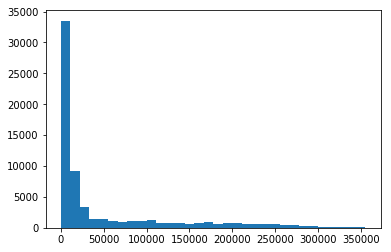

In [73]:
plt.hist(np.ravel(img_sum), bins=32)

NameError: name 'img_wf1' is not defined

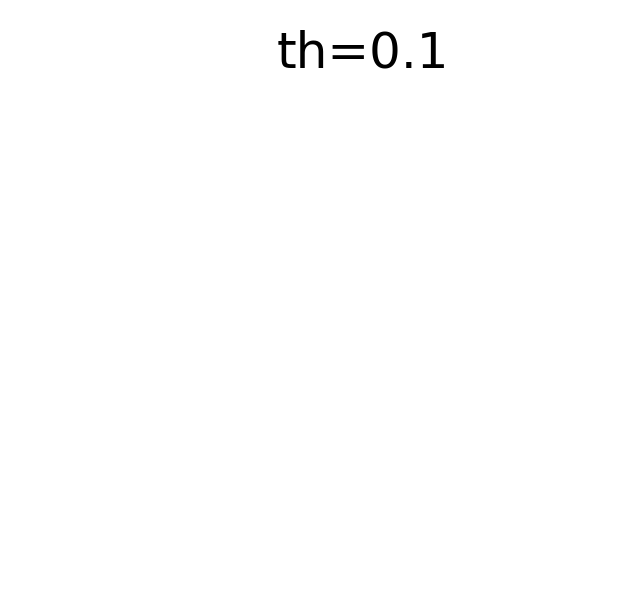

In [11]:
plt.figure(figsize=(4,6), dpi=300)
plt.subplot(321)
plt.title("th=0.1")
plt.axis('off')
plt.imshow(img_wf1, cmap='gray')
plt.subplot(322)
plt.title("th=0.1")
plt.axis('off')
plt.imshow(img_ff1, cmap='gray')
plt.subplot(323)
plt.title("th=0.2")
plt.axis('off')
plt.imshow(img_wf2, cmap='gray')
plt.subplot(324)
plt.title("th=0.2")
plt.axis('off')
plt.imshow(img_ff2, cmap='gray')
plt.subplot(325)
plt.title("th=0.7")
plt.axis('off')
plt.imshow(img_wf3, cmap='gray')
plt.subplot(326)
plt.title("th=0.7")
plt.axis('off')
plt.imshow(img_ff3, cmap='gray')

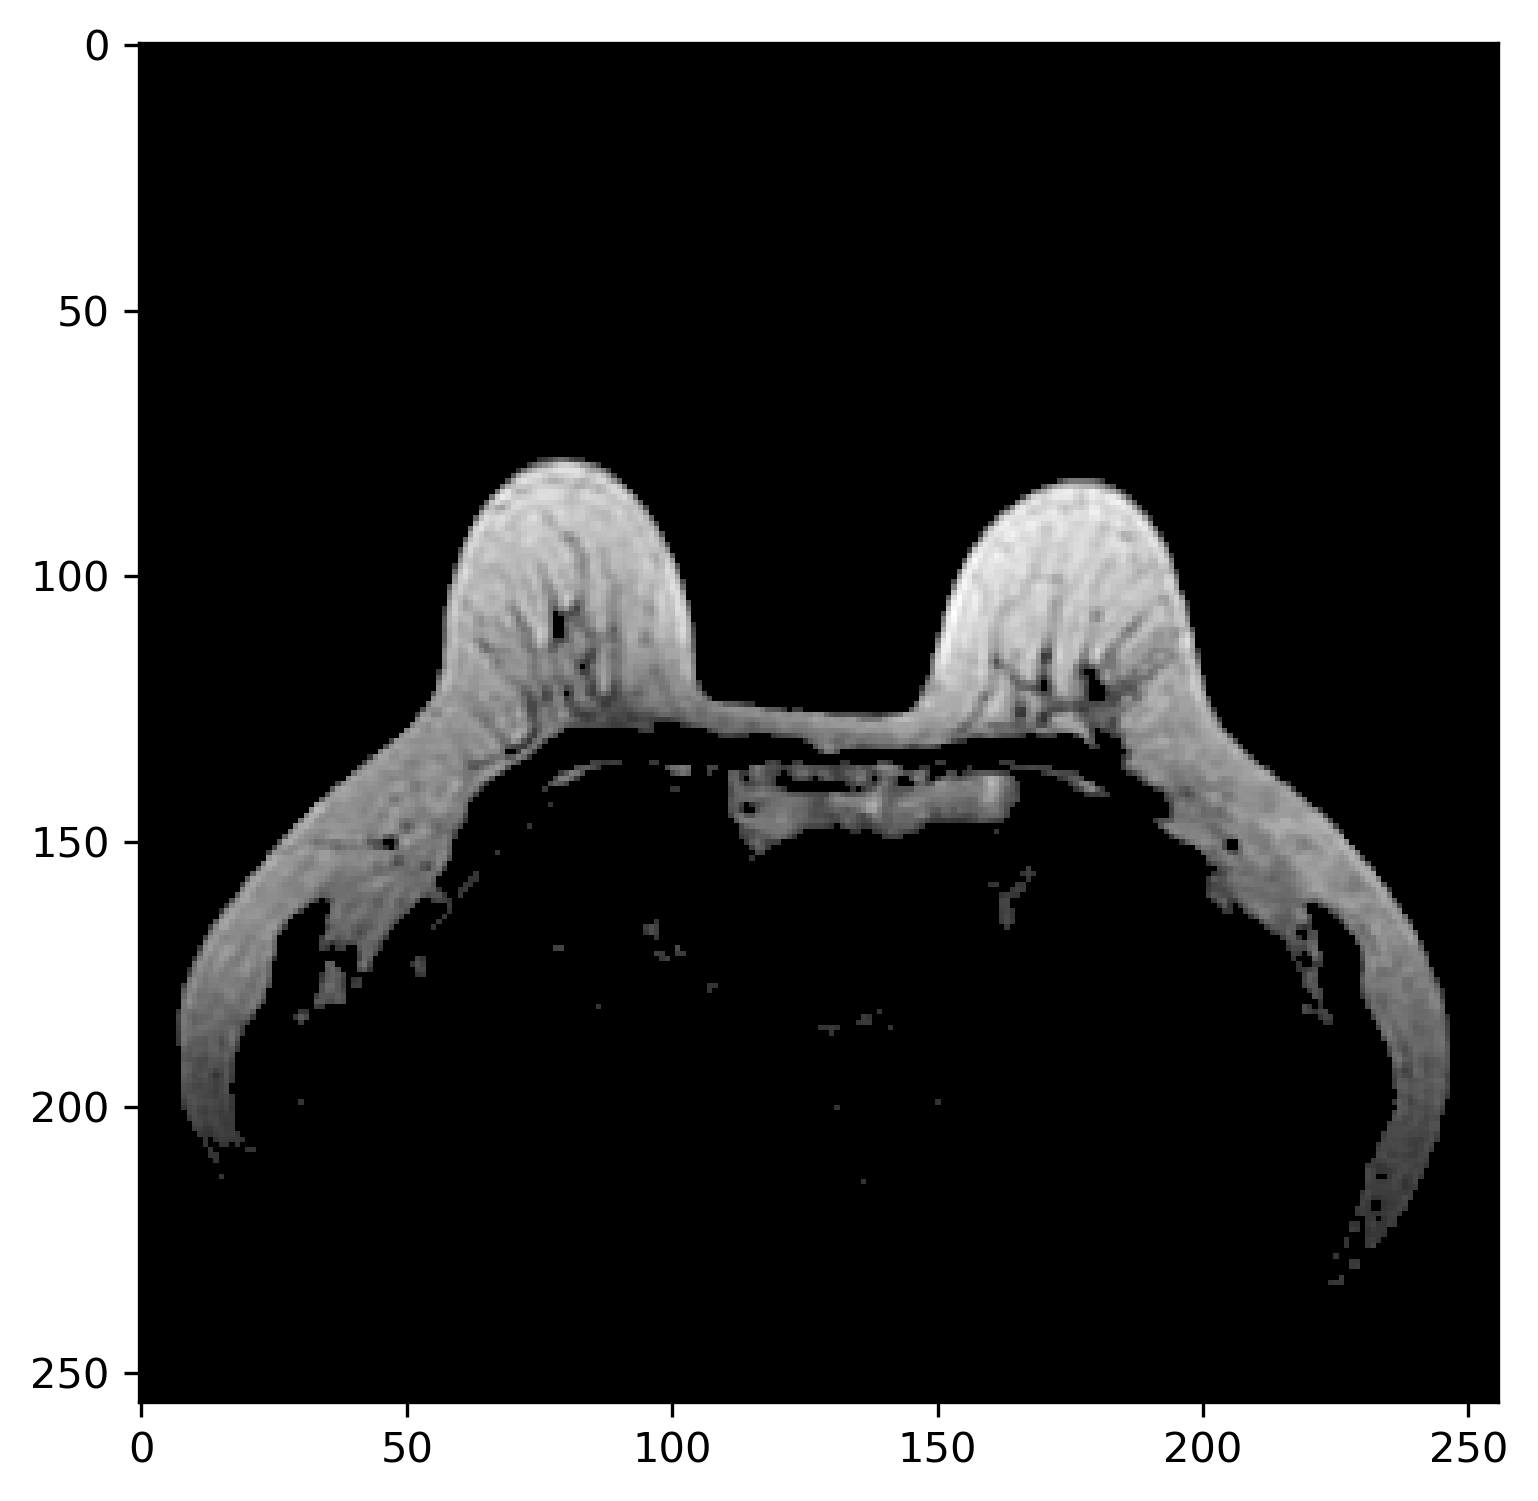

In [12]:
img_f = img_f/np.amax(img_f)
img_f[img_f<0.2] = 0
plt.figure(figsize=(6,6), dpi=300)
plt.imshow(img_f, cmap='gray')

In [101]:
IMG_ROWS = 256
IMG_COLS = 256
IDX_SLICE = 47

X = np.zeros((1, IMG_ROWS, IMG_COLS, 1))
Y = np.zeros((1, IMG_ROWS, IMG_COLS, 1))

# input
img_p = pet_data[:, :, IDX_SLICE]
X[0, :, :, 0] = np.divide(img_p, np.amax(pet_data))
Y = X

# water/fat fraction
img_w = water_data[:, :, IDX_SLICE]
img_f = fat_data[:, :, IDX_SLICE]
img_sum = img_f + img_w + 1e-6

# mask
mask_pet = np.asarray([img_p > 350]).reshape((256, 256)).astype(int)
mask_sum = np.asarray([img_sum > 150]).reshape((256, 256)).astype(int)
mask = mask_pet * mask_sum
mask = sm.opening(mask, sm.disk(5))
mask = sm.closing(mask, sm.square(5))

# water/fat fraction
img_ff = np.divide(img_f, img_sum) * mask
img_wf = np.divide(img_w, img_sum) * mask
# img_ff[img_ff <= 0.8] = 0

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (1, 256, 256, 1)
Y shape: (1, 256, 256, 1)


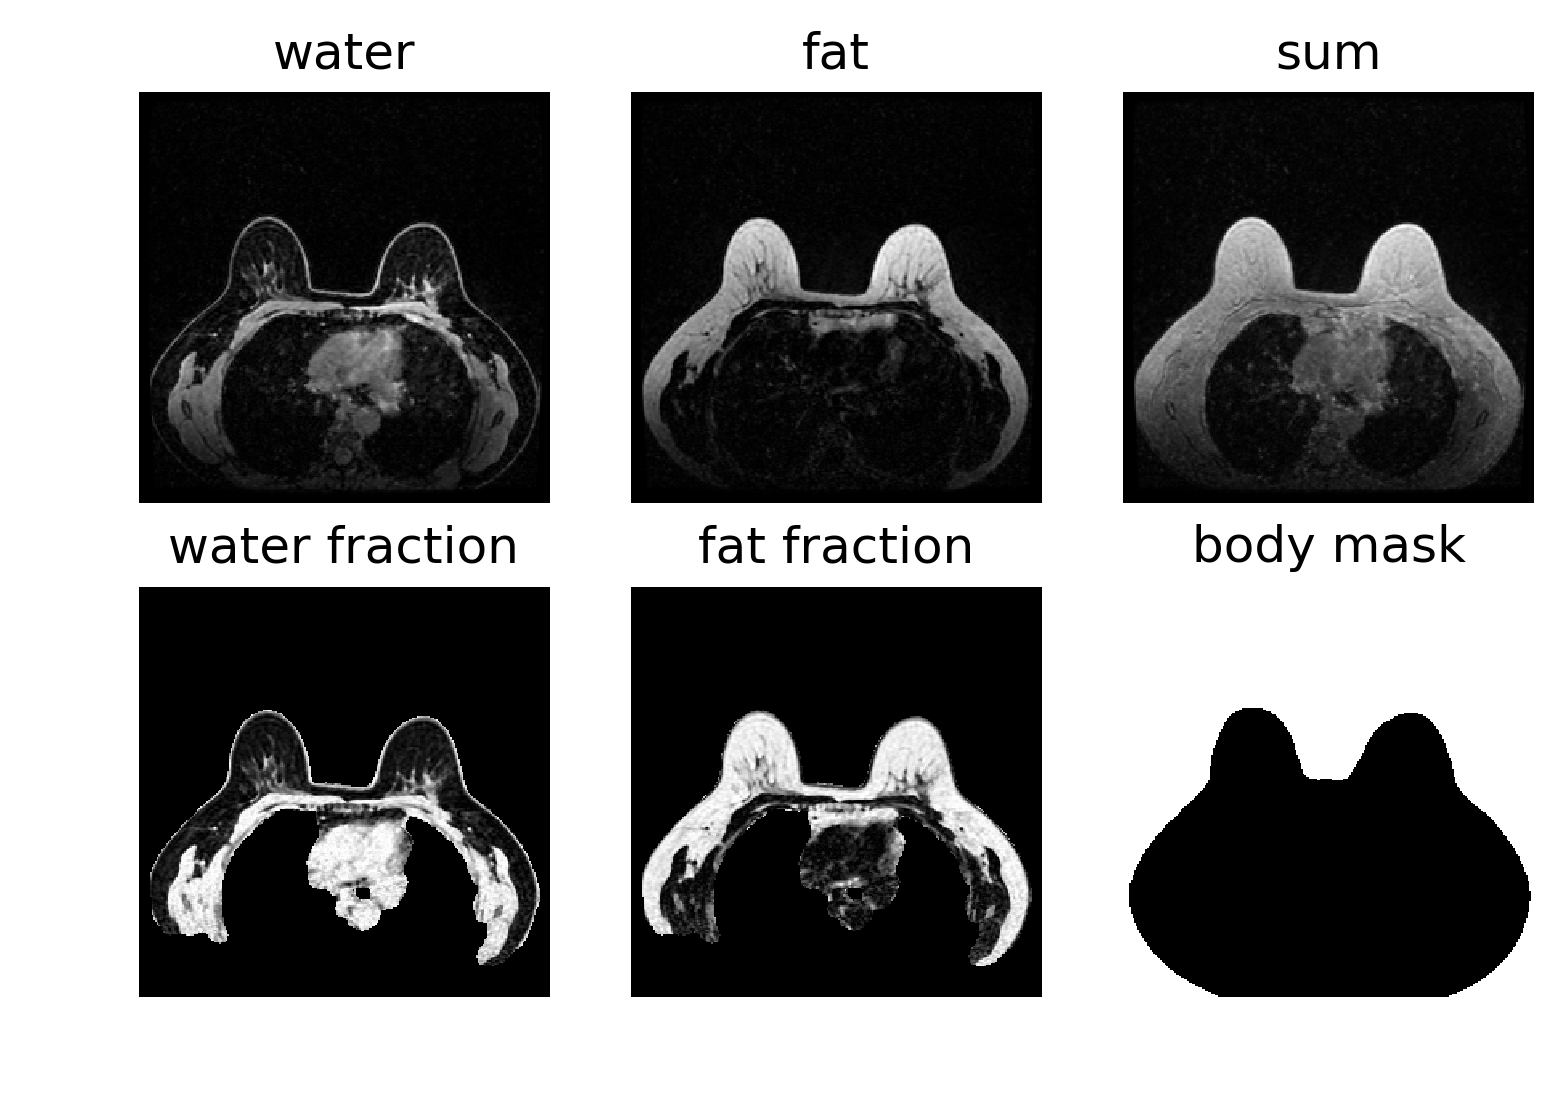

In [107]:
plt.figure(figsize=(6,4), dpi=300)
plt.subplot(231)
plt.title("water")
plt.axis('off')
plt.imshow(np.rot90(img_w,3), cmap='gray')
plt.subplot(232)
plt.title("fat")
plt.axis('off')
plt.imshow(np.rot90(img_f,3), cmap='gray')
plt.subplot(233)
plt.title("sum")
plt.axis('off')
plt.imshow(np.rot90(img_sum,3), cmap='gray')
plt.subplot(234)
plt.title("water fraction")
plt.axis('off')
plt.imshow(np.rot90(img_wf,3), cmap='gray')
plt.subplot(235)
plt.title("fat fraction")
plt.axis('off')
plt.imshow(np.rot90(img_ff,3), cmap='gray')
plt.subplot(236)
plt.title("body mask")
plt.axis('off')
plt.imshow(np.rot90(1-mask_pet,3), cmap='gray')

(array([32473.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 33063.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

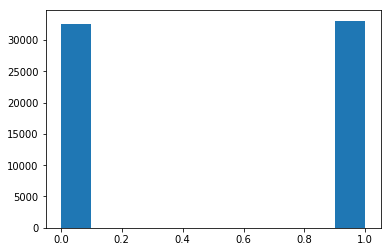

In [106]:
plt.hist(np.ravel(mask_pet))